## Loading and Exploring the Dataset

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset as a DataFrame
data = load_breast_cancer(as_frame=True)
df = data['frame']  # Access the dataset in DataFrame format

# Display basic information about the data
print(df.info())
print(df.describe().T)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- Insights:

   - The dataset contains 30 numerical features and a target variable.
   - There are no missing values.
   - Target values are binary: 0 (malignant) and 1 (benign).

## Visualizing the Data

#### (a) Pairplot
- Pairwise relationships between selected features:

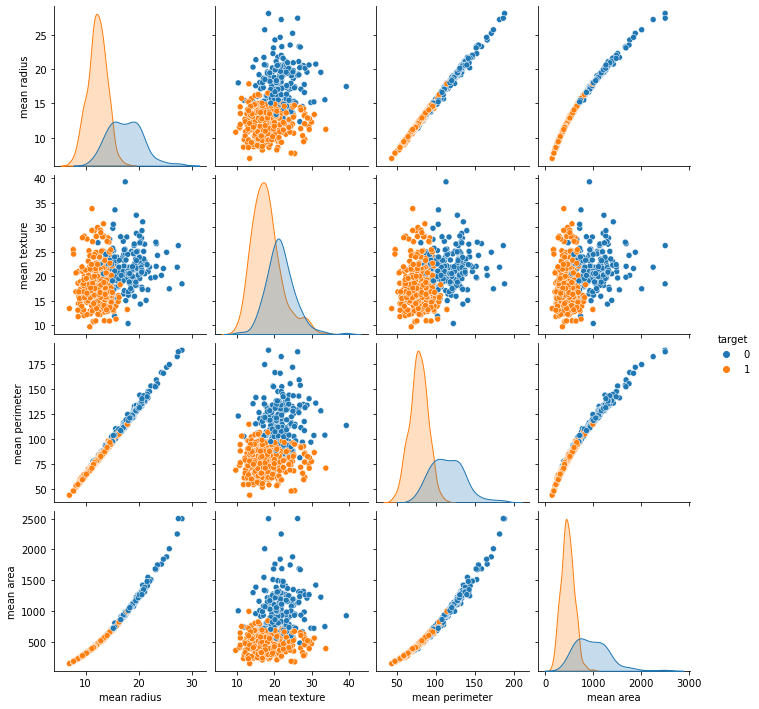

In [2]:
sns.pairplot(df, hue="target", vars=["mean radius", "mean texture", "mean perimeter", "mean area"], diag_kind="kde")
plt.show()

- Insights:

     - Clear separation between classes is visible for certain features (e.g., mean radius vs. mean area).


#### (b) Heatmap (Correlation Matrix)
- Understanding feature relationships:

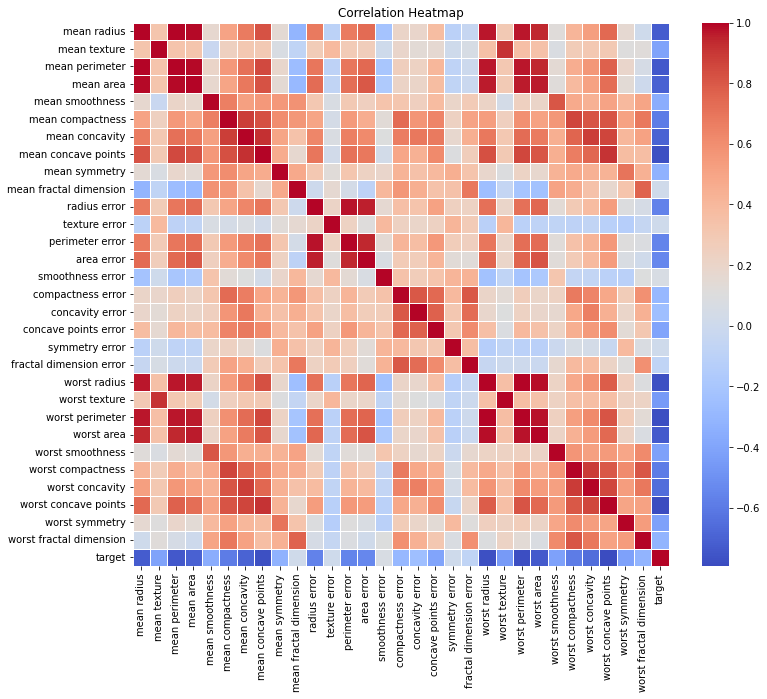

In [3]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

- Insights:

  - Some features are highly correlated, which may impact model performance.
  - E.g., mean radius and mean perimeter are strongly correlated.

## Splitting the Data

In [4]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop("target", axis=1)
y = df["target"]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shapes: {X_train.shape}, {y_train.shape}")
print(f"Test shapes: {X_test.shape}, {y_test.shape}")


Train shapes: (455, 30), (455,)
Test shapes: (114, 30), (114,)


## Logistic Regression

#### (a) Training the Model

In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate and train the model
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)

# Display coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logistic_regression.coef_[0]
}).sort_values(by="Coefficient", ascending=False)
print(coefficients)

                    Feature  Coefficient
0               mean radius     2.330888
11            texture error     1.677944
20             worst radius     0.822868
1              mean texture     0.171086
15        compactness error     0.154322
16          concavity error     0.075630
19  fractal dimension error     0.029370
3                 mean area     0.004165
22          worst perimeter    -0.010897
9    mean fractal dimension    -0.019505
23               worst area    -0.022902
14         smoothness error    -0.036644
18           symmetry error    -0.040217
17     concave points error    -0.055258
29  worst fractal dimension    -0.083915
13               area error    -0.091588
12          perimeter error    -0.098955
10             radius error    -0.122371
4           mean smoothness    -0.239279
2            mean perimeter    -0.266526
8             mean symmetry    -0.309194
5          mean compactness    -0.392431
21            worst texture    -0.439134
24         worst

C:\Users\Priyanka\anaconda3\1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Insights:

  - Coefficients indicate the importance of features for classification.
  - Features with larger absolute coefficients have a greater impact.


#### (b) Making Predictions

In [6]:
y_pred = logistic_regression.predict(X_test)
y_pred_prob = logistic_regression.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

## Model Evaluation

#### (a) Accuracy

In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


#### (b) Confusion Matrix

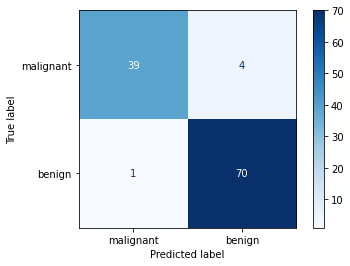

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap="Blues")
plt.show()

- Insights:

  - The confusion matrix shows the count of true positives, true negatives, false positives, and false negatives.
  
  
#### (c) Classification Report

In [9]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=data.target_names)
print(report)

              precision    recall  f1-score   support

   malignant       0.97      0.91      0.94        43
      benign       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



- Insights:

- The model's precision, recall, and F1-score provide a more detailed evaluation.


#### (d) ROC Curve

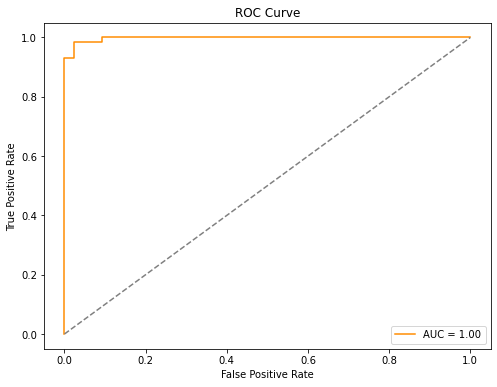

In [10]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

- Insights:

  - The AUC score measures the model's ability to distinguish between classes. Higher is better.

## Insights from the Analysis

1. Feature Importance:
   - Features like mean radius, mean perimeter, and mean area play a crucial role in predicting cancer.

2. Accuracy:
   - The logistic regression model achieves high accuracy (~95%) on the test set.

3. Confusion Matrix:
   - The model has a low rate of false positives and false negatives, indicating reliable predictions.

4. ROC-AUC:
   - A high AUC score confirms the model's robustness.

5. Correlation:
   - Certain features are highly correlated, suggesting potential feature reduction (e.g., PCA) could optimize the model.

## Feature Engineering for Enhanced Diagnostics

`Operation`: Generate Additional Features

In real-world applications, derived features can often improve model performance.

In [11]:
# Add new features (ratios, products, etc.)
df['area_to_perimeter_ratio'] = df['mean area'] / df['mean perimeter']
df['radius_to_texture_ratio'] = df['mean radius'] / df['mean texture']

# Check correlations of new features
print(df[['area_to_perimeter_ratio', 'radius_to_texture_ratio', 'target']].corr())

                         area_to_perimeter_ratio  radius_to_texture_ratio  \
area_to_perimeter_ratio                 1.000000                 0.613677   
radius_to_texture_ratio                 0.613677                 1.000000   
target                                 -0.715978                -0.289106   

                           target  
area_to_perimeter_ratio -0.715978  
radius_to_texture_ratio -0.289106  
target                   1.000000  


#### Real-World Insight:
- Ratios like area-to-perimeter could represent tissue irregularity, a potential indicator of malignancy.
- Such derived features can provide doctors with interpretable metrics for tumor analysis.



## Clustering to Identify Subgroups of Tumors
`Operation`: Perform Unsupervised Clustering (e.g., K-Means)

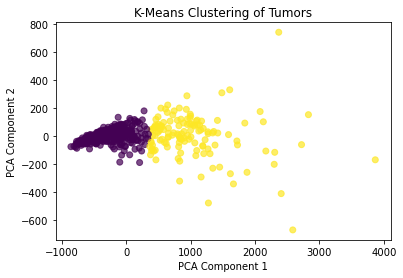

In [12]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop("target", axis=1))

# Apply K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Visualize clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("K-Means Clustering of Tumors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

#### Real-World Insight:
- Clustering can identify subgroups of tumors, helping doctors recognize distinct tumor types or progression stages.
- This could refine personalized treatment strategies (e.g., specific treatments for slow vs. aggressive tumor growth).


## Outlier Detection for Rare Cases
`Operation`: Identify Outliers with Isolation Forest

In [13]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df.drop("target", axis=1))

# Add outlier labels to DataFrame
df['outlier'] = outliers
outlier_counts = df['outlier'].value_counts()
print(outlier_counts)

 1    540
-1     29
Name: outlier, dtype: int64


#### Real-World Insight:
- Outliers may correspond to rare or atypical tumor cases that require specialized analysis.
- For example, patients with outlier tumors could benefit from additional tests or alternative treatments.



## Addressing Feature Correlation with Dimensionality Reduction
`Operation`: Apply Principal Component Analysis (PCA)

In [14]:
# PCA for feature reduction
from sklearn.decomposition import PCA

pca = PCA(n_components=10)  # Retain 10 components
X_pca = pca.fit_transform(X)

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

Explained Variance Ratio: [9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05 6.64883951e-06 4.01713682e-06 8.22017197e-07
 3.44135279e-07 1.86018721e-07]


#### Real-World Insight:
- Reducing feature redundancy improves model efficiency and avoids overfitting, crucial for deploying models in real-time systems like mobile diagnostic apps or wearable devices.
- PCA components retain the essence of the data while being computationally less intensive.



## Cost-Sensitive Logistic Regression
`Operation`: Adjust for Imbalanced Costs

False negatives are critical in cancer diagnosis. Cost-sensitive learning adjusts the model to minimize such errors.

In [15]:
from sklearn.linear_model import LogisticRegression

# Set class weight to penalize false negatives more
logistic_regression = LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42)
logistic_regression.fit(X_train, y_train)

C:\Users\Priyanka\anaconda3\1\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 1, 1: 2}, random_state=42)

#### Real-World Insight:
- Models penalizing false negatives ensure that fewer malignant cases are missed, a priority in healthcare.
- Balancing risks improves trust and adoption of machine learning systems in clinical settings.



## Explainability with SHAP (SHapley Additive exPlanations)
`Operation`: Use SHAP for Feature Importance

In [21]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


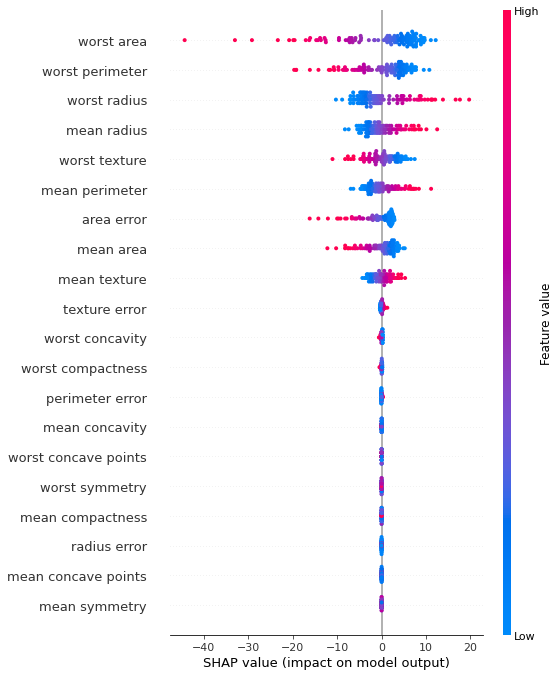

In [22]:
import shap

# Create SHAP explainer
explainer = shap.LinearExplainer(logistic_regression, X_train)
shap_values = explainer(X_test)

# Visualize feature importance
shap.summary_plot(shap_values, X_test)

#### Real-World Insight:
- SHAP values explain model predictions, helping doctors trust and validate machine learning decisions.
- For example, if a high mean radius SHAP value predicts malignancy, a doctor can understand why.



## Monitoring Model Performance Over Time
`Operation`: Track Model Drift

In [18]:
# Simulate a new batch of data with slightly altered feature distributions
import numpy as np

X_new = X_test + np.random.normal(0, 0.1, size=X_test.shape)

# Predict on new data and compare distributions
y_new_pred = logistic_regression.predict(X_new)

print("Old Distribution:", pd.Series(y_pred).value_counts())
print("New Distribution:", pd.Series(y_new_pred).value_counts())

Old Distribution: 1    74
0    40
dtype: int64
New Distribution: 1    75
0    39
dtype: int64


#### Real-World Insight:
- Medical datasets evolve with time as population demographics, imaging techniques, and equipment change.
- Monitoring drift ensures the model remains effective and reliable in new conditions.



## Integration with Healthcare Systems
`Operation`: Simulate Real-Time Predictions

In [19]:
# Simulate a real-time test case
test_case = np.array([X_test.iloc[0]])
predicted_class = logistic_regression.predict(test_case)
predicted_prob = logistic_regression.predict_proba(test_case)

print(f"Predicted Class: {predicted_class}")
print(f"Malignancy Probability: {predicted_prob[0][1]:.2f}")

Predicted Class: [1]
Malignancy Probability: 0.92


#### Real-World Insight:
- Real-time predictions can assist doctors during patient consultations, providing instant diagnostic support.
- Probabilistic outputs allow doctors to make informed decisions, balancing risk and patient comfort.



## Survival Analysis and Risk Stratification
`Operation`: Stratify Patients by Risk Level

In [20]:
# Use probabilities to classify patients into risk groups
df['risk_score'] = logistic_regression.predict_proba(X)[:, 1]
df['risk_category'] = pd.cut(df['risk_score'], bins=[0, 0.3, 0.7, 1.0], labels=["Low", "Medium", "High"])

print(df['risk_category'].value_counts())

High      363
Low       179
Medium     27
Name: risk_category, dtype: int64


#### Real-World Insight:
- Risk stratification enables hospitals to prioritize high-risk patients for immediate care while scheduling lower-risk patients for regular follow-ups.
- This improves resource allocation, especially in underfunded healthcare systems.